<a href="https://colab.research.google.com/github/TGandhi5473/APANProjects/blob/main/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install --upgrade yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.4/118.4 kB 2.1 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.61
    Uninstalling yfinance-0.2.61:
      Successfully uninstalled yfinance-0.2.61


In [3]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=a40e39cbe57d97bc45ddf36728eecab60d6b0fce7a499ced27cacdfa780e6d74
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download MSFT stock data
df = yf.download("MSFT", start="2023-06-01", end="2025-06-01", interval="1d", auto_adjust=True)

# Drop any missing data
df.dropna(inplace=True)

# Time-based features
df["DayOfWeek"] = df.index.dayofweek         # 0 = Monday
df["Month"] = df.index.month
df["Quarter"] = df.index.quarter
df["IsMonthEnd"] = df.index.is_month_end.astype(int)
df["IsQuarterEnd"] = df.index.is_quarter_end.astype(int)

# Daily and cumulative returns
df["DailyReturn"] = df["Close"].pct_change()
df["CumulativeReturn"] = (1 + df["DailyReturn"]).cumprod()

# Price ratios
df["HighLowRatio"] = df["High"] / df["Low"]
df["CloseOpenRatio"] = df["Close"] / df["Open"]

# Volatility (10-day rolling std of daily returns)
df["Volatility_10d"] = df["DailyReturn"].rolling(window=10).std()


# Define the earnings dates
earnings_dates = pd.to_datetime([
    "2023-07-25", "2023-10-24", "2024-01-30", "2024-04-25",
    "2024-07-30", "2024-10-29", "2025-01-29", "2025-04-30",
    "2025-07-29"
])

# Assuming 'df' is your DataFrame with a DateTime index
df['IsEarnings'] = df.index.isin(earnings_dates).astype(int)


# Create earnings flag column
df["IsEarnings"] = df.index.isin(earnings_dates).astype(int)

# Clean up NaNs from rolling calculations
df = df.dropna()

# Display sample
print(df[["Close", "DailyReturn", "CumulativeReturn", "Volatility_10d",
          "HighLowRatio", "CloseOpenRatio", "IsEarnings",
          "DayOfWeek", "Month", "Quarter", "IsMonthEnd", "IsQuarterEnd"]].head())


[*********************100%***********************]  1 of 1 completed

Price            Close DailyReturn CumulativeReturn Volatility_10d  \
Ticker            MSFT                                               
Date                                                                 
2023-06-15  342.770111    0.031897         1.046666       0.015998   
2023-06-16  337.088409   -0.016576         1.029316       0.017251   
2023-06-20  332.873932   -0.012503         1.016447       0.017869   
2023-06-21  328.452698   -0.013282         1.002947       0.018290   
2023-06-22  334.508514    0.018437         1.021439       0.015432   

Price      HighLowRatio CloseOpenRatio IsEarnings DayOfWeek Month Quarter  \
Ticker                                                                      
Date                                                                        
2023-06-15     1.037485       1.031469          0         3     6       2   
2023-06-16     1.027840       0.974411          0         4     6       2   
2023-06-20     1.018520       0.996287          0     

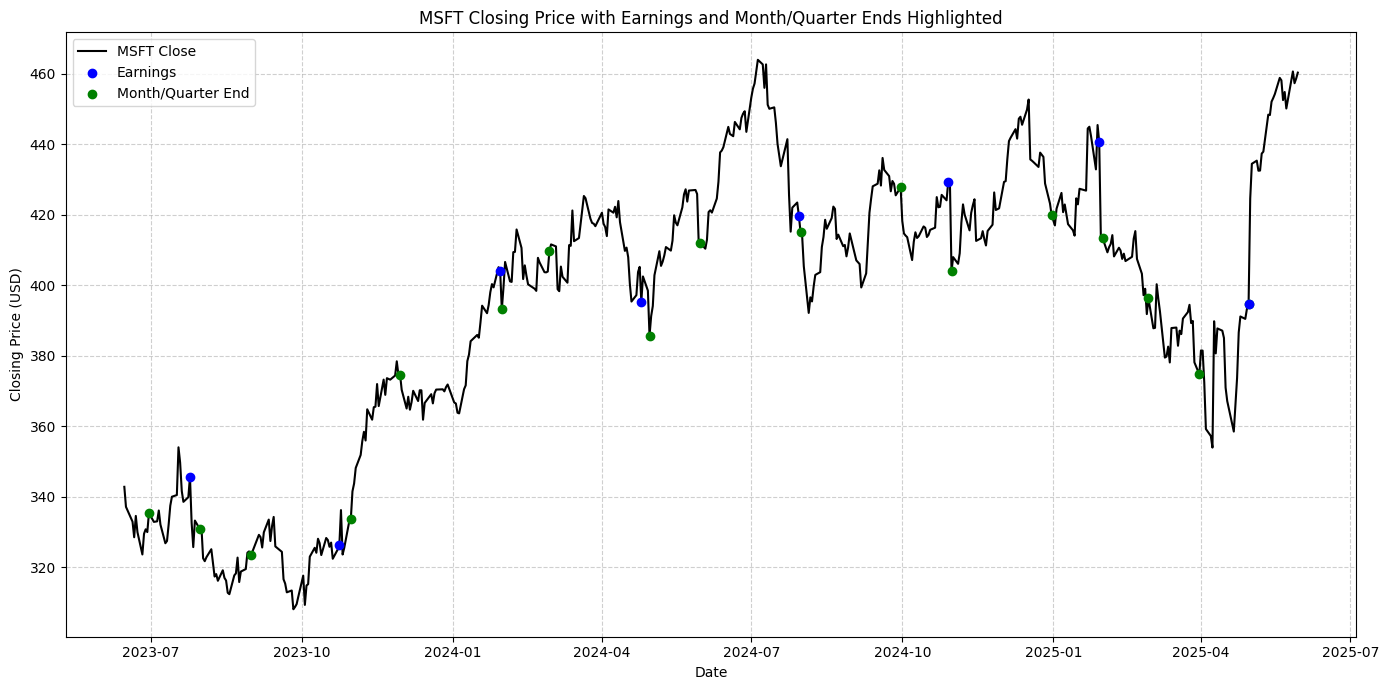

In [5]:
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df.index, df["Close"], label="MSFT Close", color="black", linewidth=1.5)

# Highlight earnings dates (blue)
earnings_df = df[df["IsEarnings"] == 1]
plt.scatter(earnings_df.index, earnings_df["Close"], color='blue', label="Earnings", zorder=5)

# Highlight month-end or quarter-end dates (green)
highlight_df = df[(df["IsMonthEnd"] == 1) | (df["IsQuarterEnd"] == 1)]
plt.scatter(highlight_df.index, highlight_df["Close"], color='green', label="Month/Quarter End", zorder=4)

plt.title("MSFT Closing Price with Earnings and Month/Quarter Ends Highlighted")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

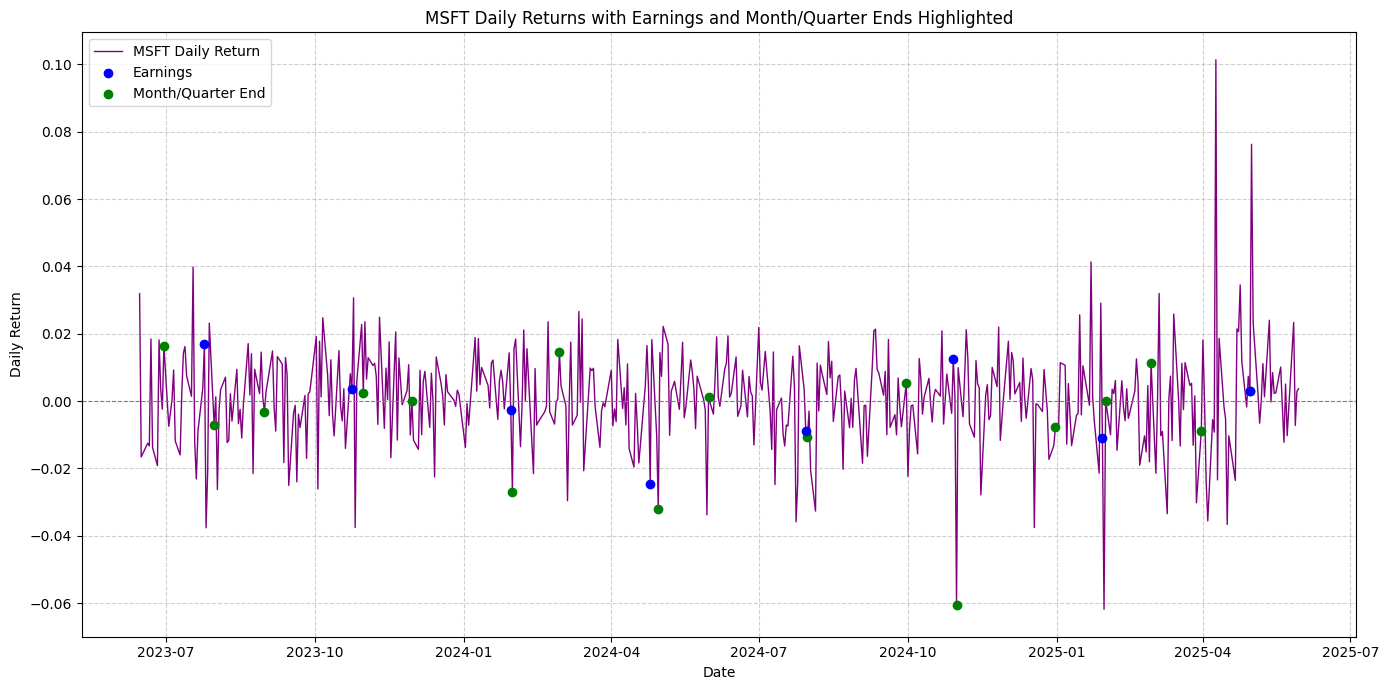

In [6]:
# Plotting Daily Returns with Highlights
plt.figure(figsize=(14, 7))

# Plot the daily returns
plt.plot(df.index, df["DailyReturn"], label="MSFT Daily Return", color="purple", linewidth=1)

# Highlight earnings dates (blue)
# We need the DailyReturn value for earnings dates for the scatter plot
earnings_df = df[df["IsEarnings"] == 1]
plt.scatter(earnings_df.index, earnings_df["DailyReturn"], color='blue', label="Earnings", zorder=5)

# Highlight month-end or quarter-end dates (green)
# We need the DailyReturn value for highlight dates for the scatter plot
highlight_df = df[(df["IsMonthEnd"] == 1) | (df["IsQuarterEnd"] == 1)]
plt.scatter(highlight_df.index, highlight_df["DailyReturn"], color='green', label="Month/Quarter End", zorder=4)

# Add a horizontal line at 0 for reference
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)

plt.title("MSFT Daily Returns with Earnings and Month/Quarter Ends Highlighted")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

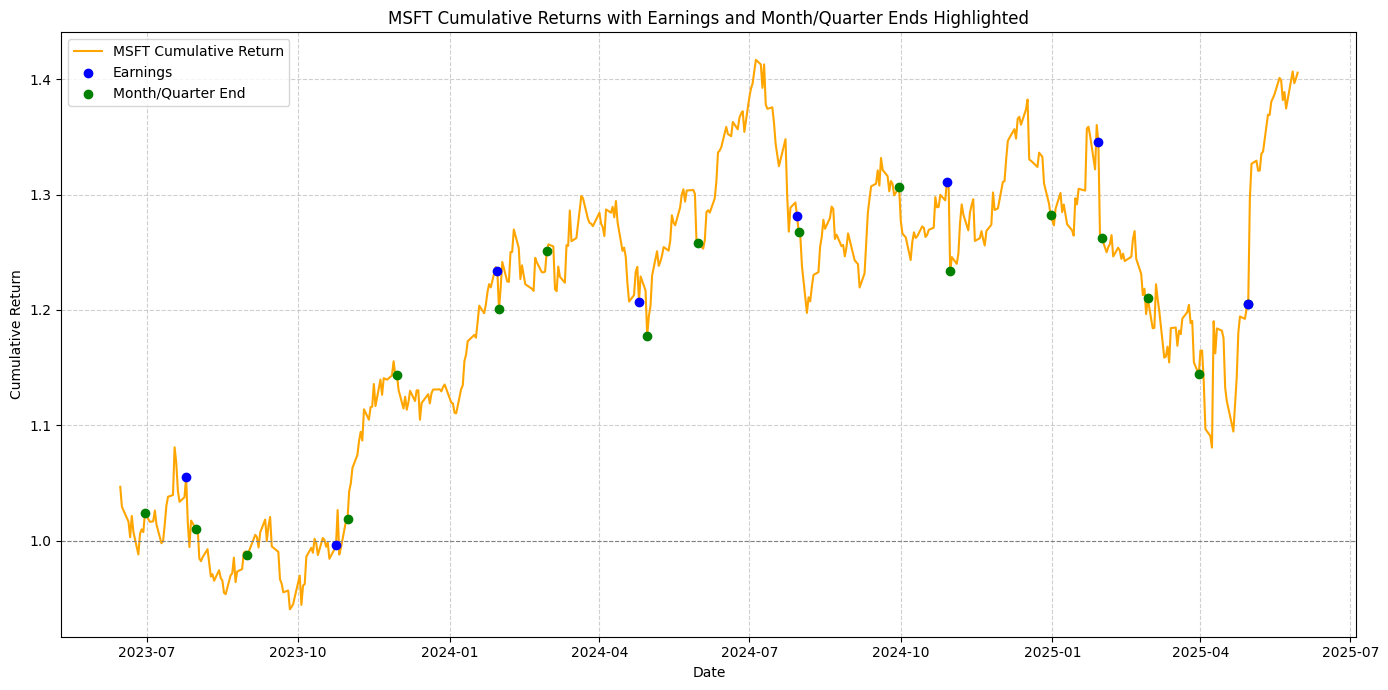

In [7]:
# Plotting Cumulative Returns with Highlights
plt.figure(figsize=(14, 7))

# Plot the cumulative returns
plt.plot(df.index, df["CumulativeReturn"], label="MSFT Cumulative Return", color="orange", linewidth=1.5)

# Highlight earnings dates (blue)
# We need the CumulativeReturn value for earnings dates for the scatter plot
earnings_df = df[df["IsEarnings"] == 1]
plt.scatter(earnings_df.index, earnings_df["CumulativeReturn"], color='blue', label="Earnings", zorder=5)

# Highlight month-end or quarter-end dates (green)
# We need the CumulativeReturn value for highlight dates for the scatter plot
highlight_df = df[(df["IsMonthEnd"] == 1) | (df["IsQuarterEnd"] == 1)]
plt.scatter(highlight_df.index, highlight_df["CumulativeReturn"], color='green', label="Month/Quarter End", zorder=4)

# Add a horizontal line at 1.0 for reference (start of cumulative return)
plt.axhline(1.0, color='gray', linestyle='--', linewidth=0.8)


plt.title("MSFT Cumulative Returns with Earnings and Month/Quarter Ends Highlighted")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#SMA

SMA helps smoothen out short-term price volatilties and mirror longer term trends. the SMA at a given time acts like a baseline price which we compare against current prices, anomalies are then identified against some massive deviation from the norm. The deviation threshold depends on context, in my case I used 2 standard deviations.

In [38]:
import pandas as pd
# 20-day SMA of close prices
df[('SMA_20', '')] = df['Close'].rolling(window=20, min_periods=1).mean()
df[('SMA', '')] = df['Close'].rolling(window=10, min_periods=1).mean()

In [39]:
print(df.columns)
print(df['Close'].head())


MultiIndex([(           'Close', 'MSFT'),
            (            'High', 'MSFT'),
            (             'Low', 'MSFT'),
            (            'Open', 'MSFT'),
            (          'Volume', 'MSFT'),
            (       'DayOfWeek',     ''),
            (           'Month',     ''),
            (         'Quarter',     ''),
            (      'IsMonthEnd',     ''),
            (    'IsQuarterEnd',     ''),
            (     'DailyReturn',     ''),
            ('CumulativeReturn',     ''),
            (    'HighLowRatio',     ''),
            (  'CloseOpenRatio',     ''),
            (  'Volatility_10d',     ''),
            (      'IsEarnings',     ''),
            (          'SMA_20',     ''),
            (             'SMA',     ''),
            (   'SMA_Deviation',     ''),
            (         'Anomaly',     ''),
            (          'SMA_10',     ''),
            (          'SMA_30',     ''),
            (         'SES_0.2',     ''),
            (           'Trend',  

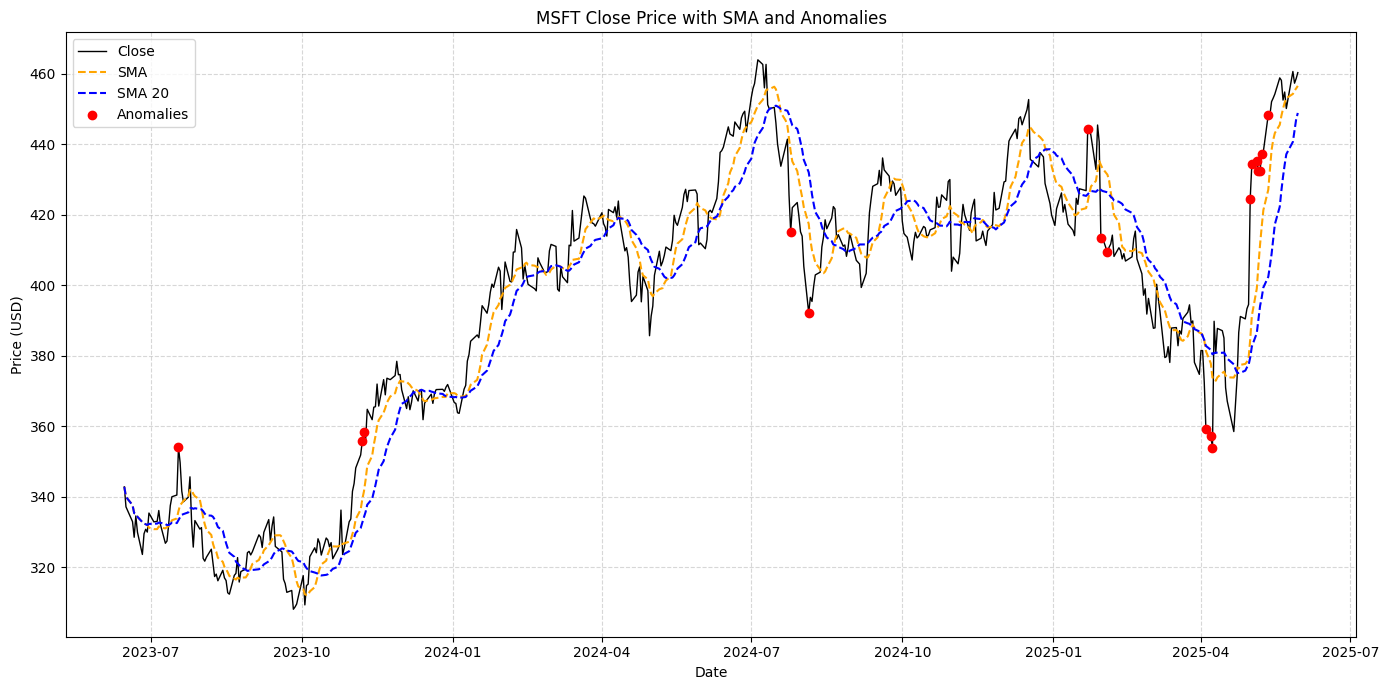

In [40]:
# Calculate deviation from SMA (as %)
df[('SMA_Deviation', '')] = (df[('Close', 'MSFT')] - df[('SMA', '')]) / df[('SMA', '')]

# Flag anomalies: where deviation is more than 2 standard deviations
threshold = 2 * df[('SMA_Deviation', '')].std()
df[('Anomaly', '')] = (df[('SMA_Deviation', '')].abs() > threshold).astype(int)
anomalies = df[df[('Anomaly', '')] == 1]

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(df.index, df[('Close', 'MSFT')], label='Close', color='black', linewidth=1)
plt.plot(df.index, df[('SMA', '')], label='SMA', color='orange', linestyle='--')
plt.plot(df.index, df[('SMA_20', '')], label='SMA 20', color='blue', linestyle='--')

# Highlight anomalies
plt.scatter(anomalies.index, anomalies[('Close', 'MSFT')], color='red', label='Anomalies', zorder=5)

plt.title("MSFT Close Price with SMA and Anomalies")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [41]:
# Filter for rows where an anomaly occurred
anomaly_dates_df = df[df[('Anomaly', '')] == 1]

# Get the index (dates) of these rows and convert to a list
list_of_anomaly_dates = anomaly_dates_df.index.tolist()

# Print the list of anomaly dates
print("List of dates with anomalies:")
print(list_of_anomaly_dates)


List of dates with anomalies:
[Timestamp('2023-07-18 00:00:00'), Timestamp('2023-11-07 00:00:00'), Timestamp('2023-11-08 00:00:00'), Timestamp('2024-07-25 00:00:00'), Timestamp('2024-08-05 00:00:00'), Timestamp('2025-01-22 00:00:00'), Timestamp('2025-01-30 00:00:00'), Timestamp('2025-02-03 00:00:00'), Timestamp('2025-04-04 00:00:00'), Timestamp('2025-04-07 00:00:00'), Timestamp('2025-04-08 00:00:00'), Timestamp('2025-05-01 00:00:00'), Timestamp('2025-05-02 00:00:00'), Timestamp('2025-05-05 00:00:00'), Timestamp('2025-05-06 00:00:00'), Timestamp('2025-05-07 00:00:00'), Timestamp('2025-05-08 00:00:00'), Timestamp('2025-05-12 00:00:00')]


In [42]:
earnings_dates = pd.to_datetime([
    "2023-07-25", "2023-10-24", "2024-01-30", "2024-04-25",
    "2024-07-30", "2024-10-29", "2025-01-29", "2025-04-30",
    "2025-07-29"
])

#SES

SES follows the same logic as SMA with exactly the same procedures, it results in better fits for stock prices so fewer anomalies would be flagged depending on smoothing level used.

In [60]:
from statsmodels.tsa.api import SimpleExpSmoothing

ses_model = SimpleExpSmoothing(df['Close']).fit(smoothing_level=0.2, optimized=True)
df['SES_0.2'] = ses_model.fittedvalues
ses_model_01 = SimpleExpSmoothing(df[('Close', 'MSFT')]).fit(smoothing_level=0.1, optimized=False) # Set optimized=False to use the specified level
df['SES_0.1'] = ses_model_01.fittedvalues
ses_model_03 = SimpleExpSmoothing(df[('Close', 'MSFT')]).fit(smoothing_level=0.3, optimized=False)
df['SES_0.3'] = ses_model_03.fittedvalues


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


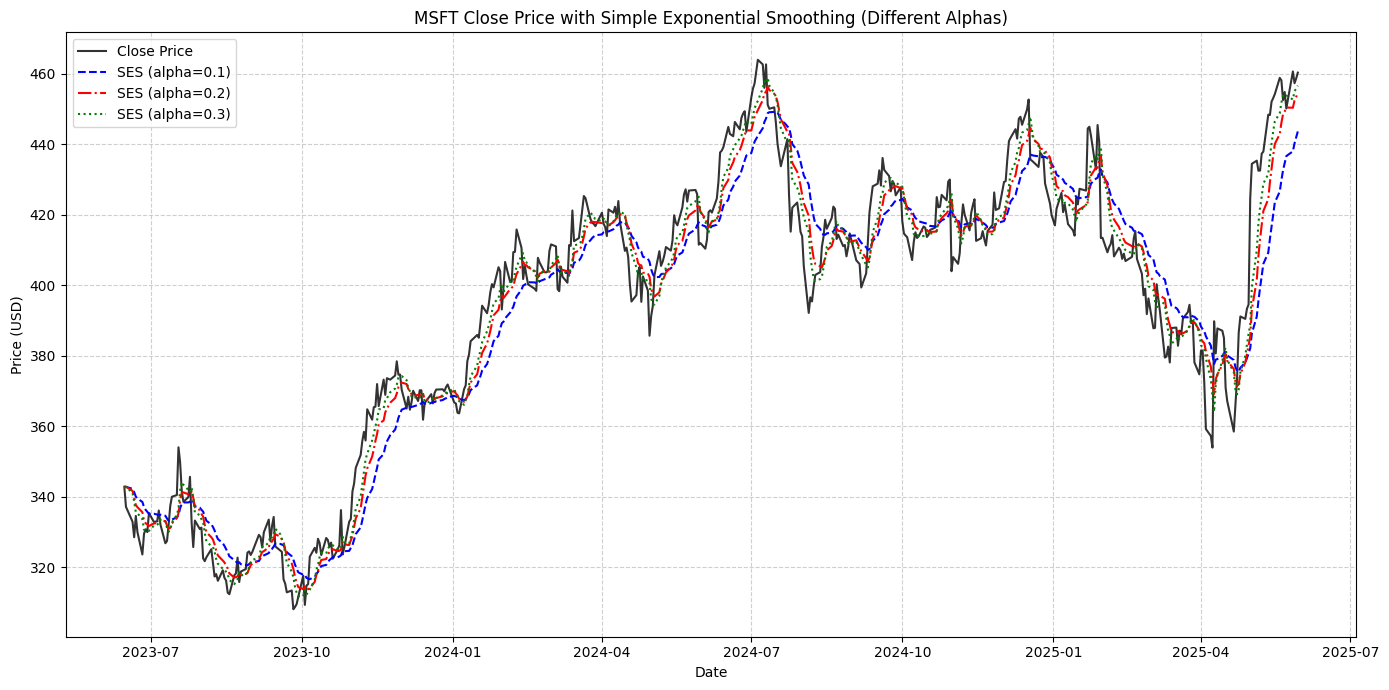

In [61]:
plt.figure(figsize=(14, 7))

plt.plot(df.index, df[('Close', 'MSFT')], label='Close Price', color='black', linewidth=1.5, alpha=0.8)
plt.plot(df.index, df['SES_0.1'], label='SES (alpha=0.1)', color='blue', linestyle='--')
plt.plot(df.index, df['SES_0.2'], label='SES (alpha=0.2)', color='red', linestyle='-.') # Different linestyle for clarity
plt.plot(df.index, df['SES_0.3'], label='SES (alpha=0.3)', color='green', linestyle=':') # Different linestyle for clarity

plt.title("MSFT Close Price with Simple Exponential Smoothing (Different Alphas)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

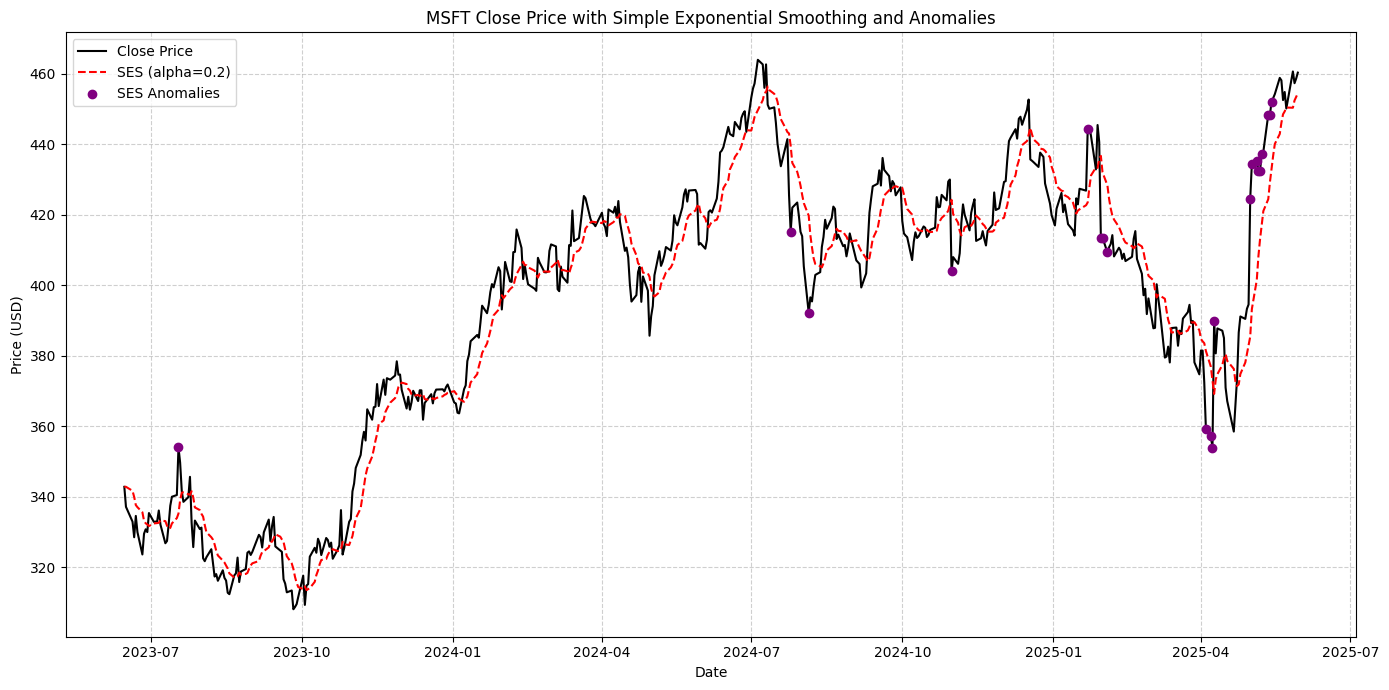

In [52]:
# Calculate the difference between Close and SES
df['SES_Difference'] = df[('Close', 'MSFT')] - df['SES_0.2']

# Calculate the standard deviation of the difference
ses_threshold = 2 * df['SES_Difference'].std()

# Flag anomalies where the absolute difference is more than the threshold
df['SES_Anomaly'] = (df['SES_Difference'].abs() > ses_threshold).astype(int)

# Filter for rows where an SES anomaly occurred
ses_anomalies_df = df[df['SES_Anomaly'] == 1]

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Plot the Close price (using multi-index)
plt.plot(df.index, df[('Close', 'MSFT')], label='Close Price', color='black', linewidth=1.5)

# Plot the Simple Exponential Smoothing (SES) values
plt.plot(df.index, df['SES_0.2'], label='SES (alpha=0.2)', color='red', linestyle='--')

# Highlight SES anomalies (using multi-index for close price)
plt.scatter(ses_anomalies_df.index, ses_anomalies_df[('Close', 'MSFT')],
            color='purple', label='SES Anomalies', zorder=5) # Using purple for visibility

plt.title("MSFT Close Price with Simple Exponential Smoothing and Anomalies")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [53]:
# Filter for rows where an SES anomaly occurred
ses_anomalies_df = df[df['SES_Anomaly'] == 1]

# Get the index (dates) of these rows and convert to a list
ses_anomaly_dates_list = ses_anomalies_df.index.tolist()

# Print the list of SES anomaly dates
print("List of dates with SES anomalies:")
print(ses_anomaly_dates_list)

# Assume list_of_anomaly_dates from code cell 41 is available in the environment
# If not, you would need to re-run cell 41 or define it here
# For demonstration, let's assume list_of_anomaly_dates is already defined.

# Find dates that are in the SMA anomaly list but NOT in the SES anomaly list
sma_only_anomalies = [date for date in list_of_anomaly_dates if date not in ses_anomaly_dates_list]

# Find dates that are in the SES anomaly list but NOT in the SMA anomaly list
ses_only_anomalies = [date for date in ses_anomaly_dates_list if date not in list_of_anomaly_dates]

# Print the comparison results
print("\nDates with SMA anomalies only:")
print(sma_only_anomalies)

print("\nDates with SES anomalies only:")
print(ses_only_anomalies)

print("\nDates with anomalies in both SMA and SES:")
# Find dates that are in BOTH lists
common_anomalies = [date for date in list_of_anomaly_dates if date in ses_anomaly_dates_list]
print(common_anomalies)

List of dates with SES anomalies:
[Timestamp('2023-07-18 00:00:00'), Timestamp('2024-07-25 00:00:00'), Timestamp('2024-08-05 00:00:00'), Timestamp('2024-10-31 00:00:00'), Timestamp('2025-01-22 00:00:00'), Timestamp('2025-01-30 00:00:00'), Timestamp('2025-01-31 00:00:00'), Timestamp('2025-02-03 00:00:00'), Timestamp('2025-04-04 00:00:00'), Timestamp('2025-04-07 00:00:00'), Timestamp('2025-04-08 00:00:00'), Timestamp('2025-04-09 00:00:00'), Timestamp('2025-05-01 00:00:00'), Timestamp('2025-05-02 00:00:00'), Timestamp('2025-05-05 00:00:00'), Timestamp('2025-05-06 00:00:00'), Timestamp('2025-05-07 00:00:00'), Timestamp('2025-05-08 00:00:00'), Timestamp('2025-05-12 00:00:00'), Timestamp('2025-05-13 00:00:00'), Timestamp('2025-05-14 00:00:00')]

Dates with SMA anomalies only:
[Timestamp('2023-11-07 00:00:00'), Timestamp('2023-11-08 00:00:00')]

Dates with SES anomalies only:
[Timestamp('2024-10-31 00:00:00'), Timestamp('2025-01-31 00:00:00'), Timestamp('2025-04-09 00:00:00'), Timestamp('2025

Exponential Smoothing's ability to adaptively smoothen usually results in very accurate prices and an ideal amount of anomalies. The logic follows simple exponential smoothing but results are based on residual thresholds which we can set. I did not set any for this model because MSFT stock has normalized returns and thus high accuracy.

In [45]:
from statsmodels.tsa.api import ExponentialSmoothing
model = ExponentialSmoothing(df['Close'], trend='add', seasonal='add',
                             seasonal_periods=5,
                             initialization_method='estimated')
fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


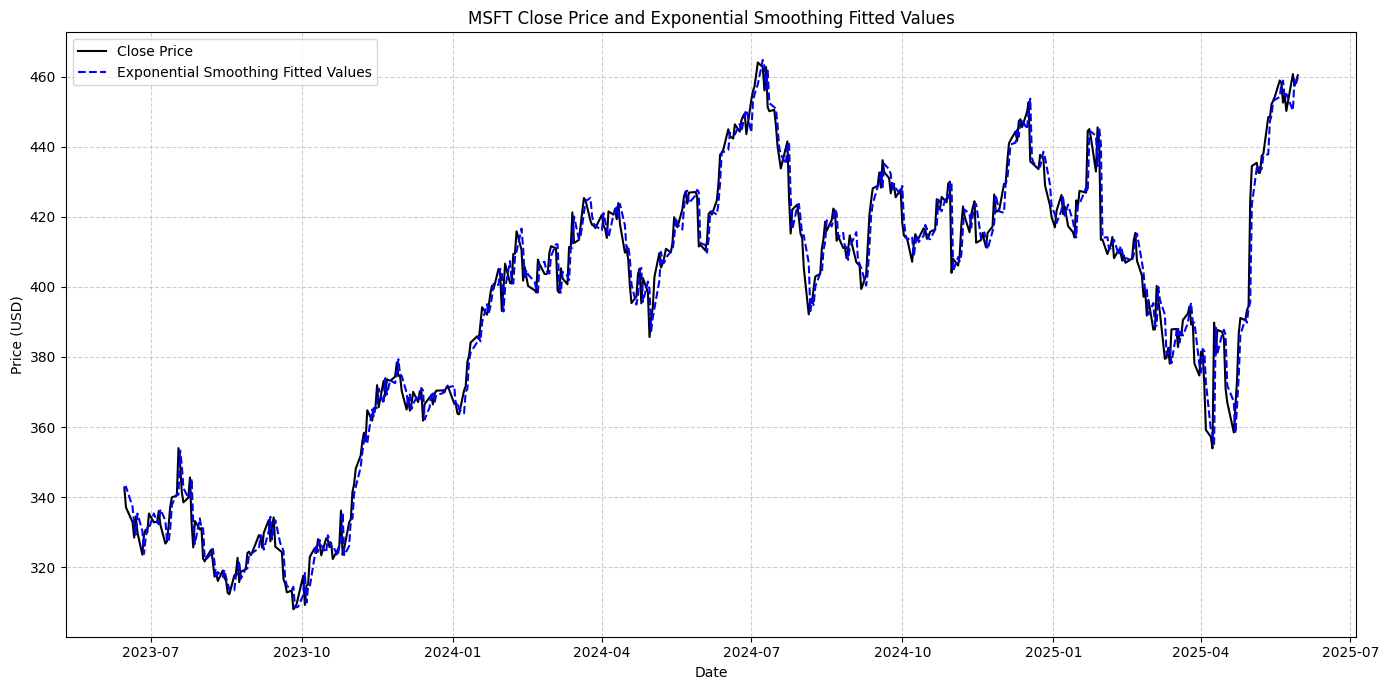

In [62]:
# Plot the original Close price and the fitted values from the Exponential Smoothing model
plt.figure(figsize=(14, 7))

# Plot the Close price (using multi-index)
plt.plot(df.index, df[('Close', 'MSFT')], label='Close Price', color='black', linewidth=1.5)

# Plot the fitted values from the Exponential Smoothing model
plt.plot(df.index, fit.fittedvalues, label='Exponential Smoothing Fitted Values', color='blue', linestyle='--')

plt.title("MSFT Close Price and Exponential Smoothing Fitted Values")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#Seasonal-Trend Decomposition

Seasonal-Trend breaks down time series into trends-long term progressions of series, seasonality-repeating patterns at some fixed interval (5 days or 252 days) and residuals for the rest. We set thresholds for residuals to find anomalies. No anomalies found using residual method, most likely because well run companies with good management don't suffer from market activity compared to other public companies.

In [49]:
from statsmodels.tsa.seasonal import STL
stl = STL(df['Close'], period=5)
res = stl.fit()
df['Trend'] = res.trend
df['Seasonal'] = res.seasonal
df['Residual'] = res.resid


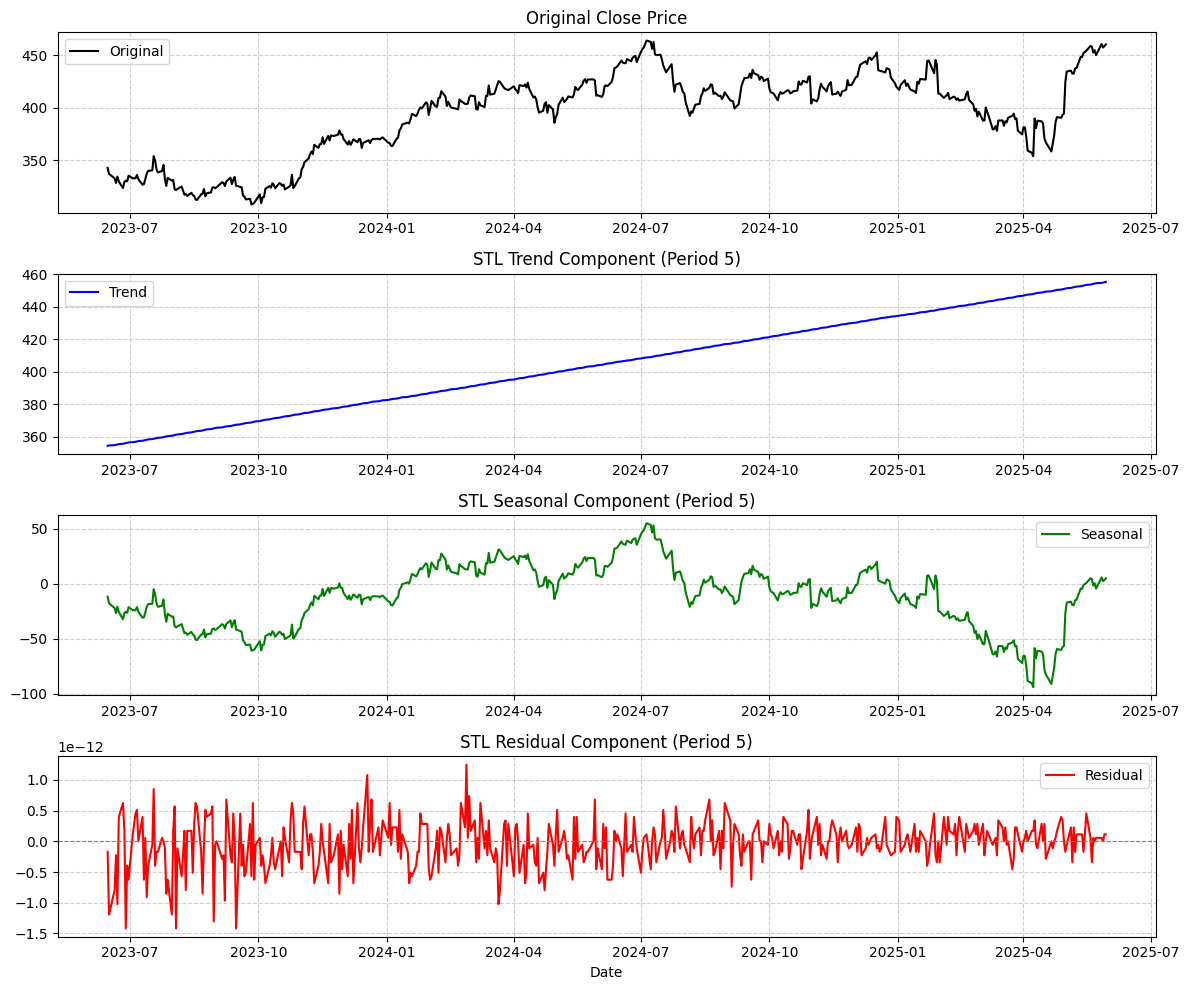

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
# Plot 1: Original Close Price
plt.subplot(4, 1, 1) # Now 4 rows, 1 column, 1st plot
plt.plot(df.index, df[('Close', 'MSFT')], label='Original', color='black')
plt.title('Original Close Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Plot 2: STL Trend Component
plt.subplot(4, 1, 2) # Now 4 rows, 1 column, 2nd plot
plt.plot(df.index, df['Trend'], label='Trend', color='blue')
plt.title('STL Trend Component (Period 5)') # Title updated to Period 5
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Plot 3: STL Seasonal Component
plt.subplot(4, 1, 3) # Now 4 rows, 1 column, 3rd plot
plt.plot(df.index, df['Seasonal'], label='Seasonal', color='green')
plt.title('STL Seasonal Component (Period 5)') # Title updated to Period 5
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Plot 4: STL Residual Component
plt.subplot(4, 1, 4) # Now 4 rows, 1 column, 4th plot
plt.plot(df.index, df['Residual'], label='Residual', color='red') # Using red for residuals
plt.title('STL Residual Component (Period 5)') # Title updated to Period 5
plt.xlabel("Date") # Add xlabel to the last plot
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8) # Add a horizontal line at 0 for reference

plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

In [68]:
from statsmodels.tsa.seasonal import STL
stl = STL(df['Close'], period=252)
res = stl.fit()
df['Trend'] = res.trend
df['Seasonal'] = res.seasonal
df['Residual'] = res.resid


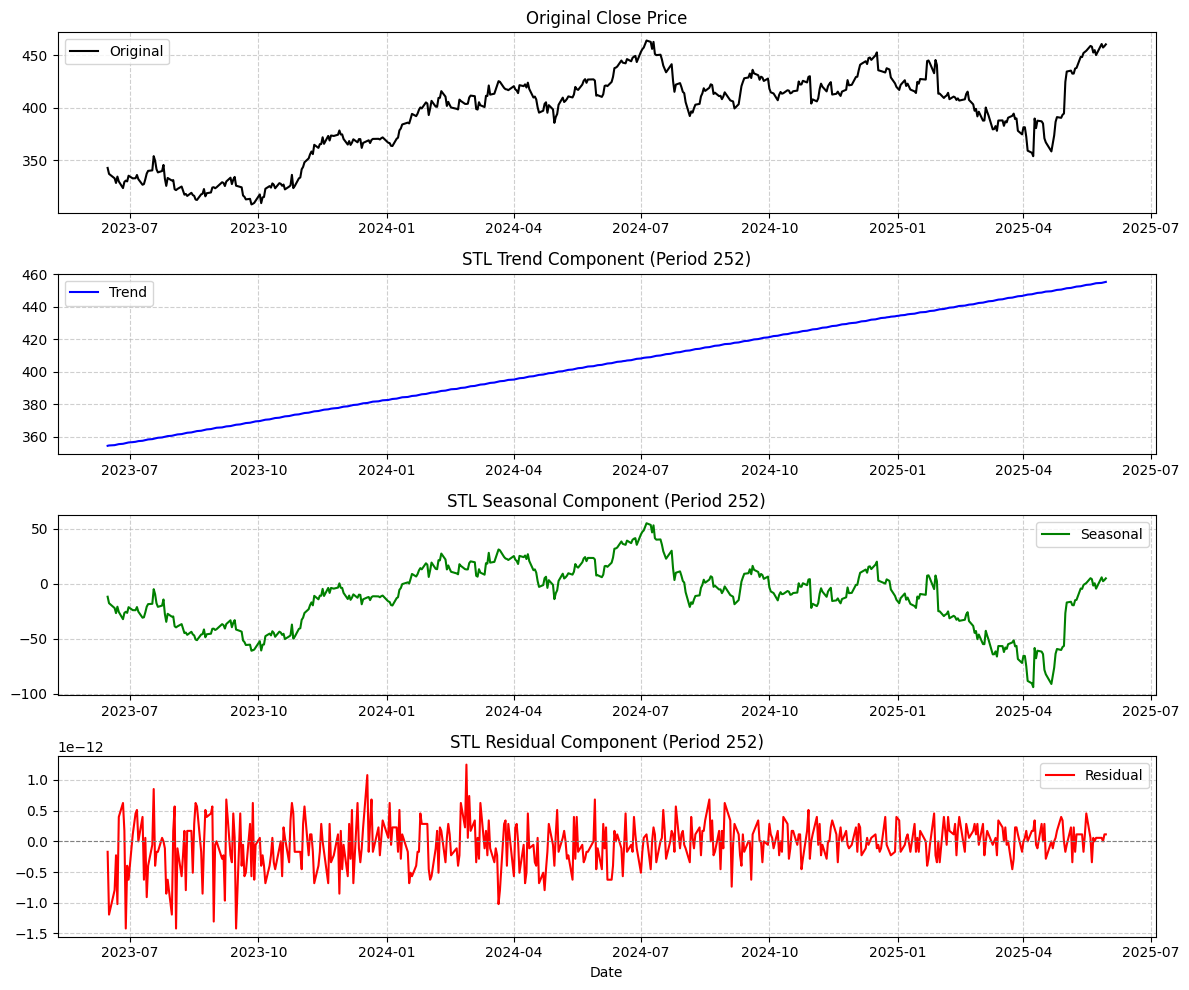

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
# Plot 1: Original Close Price
plt.subplot(4, 1, 1) # Now 4 rows, 1 column, 1st plot
plt.plot(df.index, df[('Close', 'MSFT')], label='Original', color='black')
plt.title('Original Close Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Plot 2: STL Trend Component
plt.subplot(4, 1, 2) # Now 4 rows, 1 column, 2nd plot
plt.plot(df.index, df['Trend'], label='Trend', color='blue')
plt.title('STL Trend Component (Period 252)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Plot 3: STL Seasonal Component
plt.subplot(4, 1, 3) # Now 4 rows, 1 column, 3rd plot
plt.plot(df.index, df['Seasonal'], label='Seasonal', color='green')
plt.title('STL Seasonal Component (Period 252)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Plot 4: STL Residual Component
plt.subplot(4, 1, 4) # Now 4 rows, 1 column, 4th plot
plt.plot(df.index, df['Residual'], label='Residual', color='red') # Using red for residuals
plt.title('STL Residual Component (Period 252)')
plt.xlabel("Date") # Add xlabel to the last plot
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8) # Add a horizontal line at 0 for reference

plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

#Prophet

Prophet relied on confidence intervals to explain uncertainty. Since Prophet generated future data, the same logic used in prior models will not apply. Instead, actual future data that arives will be compared to the CI's generated and only be classified as an anomaly if it falls outside of the CI's range. Prophet allows for more flexibility as we can add regressors to see what anomalies there potentially are.

In [24]:
# Step 1: Reconstruct the DataFrame cleanly
prophet_df = df.reset_index()[['Date', 'Close']].copy()

# Step 2: Rename columns for Prophet
prophet_df.columns = ['ds', 'y']

# Step 3: Ensure datetime type for 'ds'
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'], errors='coerce')

# Step 4: Ensure numeric type for 'y'
prophet_df['y'] = pd.to_numeric(prophet_df['y'], errors='coerce')

# Step 5: Drop any rows with missing values in either column
prophet_df.dropna(subset=['ds', 'y'], inplace=True)

# Optional: Sanity check
print(prophet_df.dtypes)
print(prophet_df.head())
print(prophet_df.shape)

ds    datetime64[ns]
y            float64
dtype: object
          ds           y
0 2023-06-15  342.770111
1 2023-06-16  337.088409
2 2023-06-20  332.873932
3 2023-06-21  328.452698
4 2023-06-22  334.508514
(491, 2)


In [56]:
import pandas as pd
from prophet import Prophet
from pandas.tseries.offsets import BDay


# Step 1: Reconstruct the DataFrame cleanly for Prophet, including Volume and IsEarnings
prophet_df = df.reset_index()[['Date', 'Close', 'Volume', 'IsEarnings']].copy()

# Step 2: Rename columns for Prophet
prophet_df.columns = ['ds', 'y', 'Volume', 'IsEarnings']

# Step 3: Ensure datetime type for 'ds'
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'], errors='coerce')

# Step 4: Ensure numeric types for 'y', 'Volume', and 'IsEarnings'
prophet_df['y'] = pd.to_numeric(prophet_df['y'], errors='coerce')
prophet_df['Volume'] = pd.to_numeric(prophet_df['Volume'], errors='coerce')
prophet_df['IsEarnings'] = pd.to_numeric(prophet_df['IsEarnings'], errors='coerce')


# Step 5: Calculate and add lagged return and rolling volatility features
prophet_df['DailyReturn'] = prophet_df['y'].pct_change()
prophet_df['lagged_return_1'] = prophet_df['DailyReturn'].shift(1)
prophet_df['RollingVolatility_10d'] = prophet_df['DailyReturn'].rolling(window=10).std()

# Step 6: Drop any rows with missing values that might result from feature engineering
# (e.g., due to pct_change, shift, or rolling calculations at the beginning of the series)
prophet_df.dropna(subset=['y', 'Volume', 'IsEarnings', 'lagged_return_1', 'RollingVolatility_10d'], inplace=True)

# Optional: Sanity check the data before fitting
print("Prophet DataFrame with regressors:")
print(prophet_df.head())
print(prophet_df.dtypes)
print(prophet_df.shape)


# Step 7: Initialize Prophet model and add regressors
m = Prophet(daily_seasonality=True)
m.add_regressor('Volume')
m.add_regressor('IsEarnings')
m.add_regressor('lagged_return_1')
m.add_regressor('RollingVolatility_10d')

# Step 8: Fit the model
m.fit(prophet_df)

print("\nProphet model initialized and fitted with regressors.")



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl6e_f3au/el9l7c2c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl6e_f3au/dsghz0ru.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33515', 'data', 'file=/tmp/tmpl6e_f3au/el9l7c2c.json', 'init=/tmp/tmpl6e_f3au/dsghz0ru.json', 'output', 'file=/tmp/tmpl6e_f3au/prophet_model54oirm0z/prophet_model-20250614222018.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:20:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:20:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet DataFrame with regressors:
           ds           y    Volume  IsEarnings  DailyReturn  lagged_return_1  \
10 2023-06-30  335.325806  26823800           0     0.016386        -0.002382   
11 2023-07-03  332.814880  12508700           0    -0.007488         0.016386   
12 2023-07-05  332.972412  18172400           0     0.000473        -0.007488   
13 2023-07-06  336.044647  28161200           0     0.009227         0.000473   
14 2023-07-07  332.056641  21185300           0    -0.011867         0.009227   

    RollingVolatility_10d  
10               0.015204  
11               0.014497  
12               0.013941  
13               0.013342  
14               0.012713  
ds                       datetime64[ns]
y                               float64
Volume                            int64
IsEarnings                        int64
DailyReturn                     float64
lagged_return_1                 float64
RollingVolatility_10d           float64
dtype: object
(481, 7)

Prophe

In [58]:
from pandas.tseries.offsets import BDay

# 1. Create future trading days (e.g., 60 business days ahead)
last_date = prophet_df['ds'].max()
future_dates = pd.date_range(start=last_date + BDay(1), periods=60, freq=BDay())
future = pd.DataFrame({'ds': future_dates})

# 2. Add placeholder columns for the regressors in the future DataFrame
future['Volume'] = prophet_df['Volume'].iloc[-1] # Example: use the last known volume
future['IsEarnings'] = 0  # Assume no earnings in the next 60 days unless you know the dates
future['lagged_return_1'] = 0 # Or use last known return, but 0 is a common placeholder
future['RollingVolatility_10d'] = prophet_df['RollingVolatility_10d'].iloc[-1] # Example: use the last known volatility

# 3. Predict
forecast = m.predict(future)

# 4. Display the forecast
print("\nFuture Forecast:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())


Future Forecast:
          ds        yhat  yhat_lower  yhat_upper
0 2025-06-02  416.357129  395.899677  437.104865
1 2025-06-03  416.707055  395.692200  437.614347
2 2025-06-04  417.415938  397.274351  437.221604
3 2025-06-05  415.979852  394.739332  435.335638
4 2025-06-06  417.577796  395.932931  438.444421


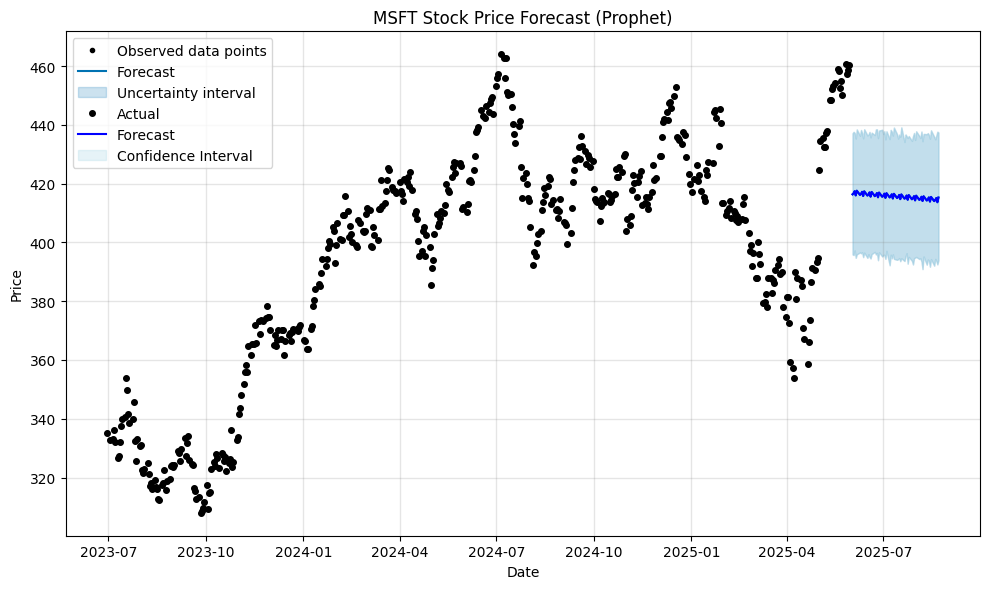

In [59]:
# Plot the forecast from Prophet
fig = m.plot(forecast)

# Plot actual historical data on top (as bold black dots)
plt.plot(prophet_df['ds'], prophet_df['y'], 'o', color='black', markersize=4, label='Actual')

# Highlight predicted mean with a blue line
plt.plot(forecast['ds'], forecast['yhat'], color='blue', label='Forecast')

plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'],
                 color='lightblue', alpha=0.3, label='Confidence Interval')

plt.title("MSFT Stock Price Forecast (Prophet)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
